In [5]:

from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud


In [6]:
pd.set_option('display.max_rows', None)    
pd.set_option('display.max_columns', None)

### Veri setini okuduk

In [7]:
df=pd.read_csv("amazon_reviews.csv",sep=",")

In [8]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


### Bizim için önemli olan kısım reviewText kısmı ,normalizasyon işlemi yapıyoruz.Hepsini aynı formata getiriyoruz.Bütün kelimleri küçük harf yaptık.


In [9]:
df["reviewText"]=df["reviewText"].str.lower()

In [10]:
df["reviewText"].head(3)

0                                           no issues.
1    purchased this for my device, it worked as adv...
2    it works as expected. i should have sprung for...
Name: reviewText, dtype: object

### Cümlelerden noktalama işaretlerini kaldıracağız çünkü bir etkisi yok.[^\w\s] bu düzenli ifadeyi kullanarak noktalama işaretleri yerine boşlukla yer değiştirdik.

In [11]:
df["reviewText"] = df["reviewText"].str.replace(r'[^\w\s]', ' ', regex=True)

In [12]:
df["reviewText"].head(3)

0                                           no issues 
1    purchased this for my device  it worked as adv...
2    it works as expected  i should have sprung for...
Name: reviewText, dtype: object

### Cümlelerden sayıları da çıkaracağız.Anlam ifade etmediğini düşünüyoruz.(Her proje için geçerli değildir). [\d] düzenli ifadesini kullanıyoruz.Sayılar yerine boşluk koyuyoruz.

In [13]:
df["reviewText"]=df["reviewText"].str.replace('[\d]',' ', regex=True)

### Cümlelerden noktalama işaretlerini kaldırdık,sayıları kaldırdık.StopWords dediğimiz kelimeleri de kaldırmalıyız.StopWords anlam ifade etmeyen kelimeler bunun kütüphanesi vardır.Örneğin; this,for vb. kelimler

In [14]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iremu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
sw=stopwords.words("english")

### Burada anlam ifade etmeyen İngilizce kelimeleri listeledik.

In [16]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### reviewText sütunundaki kelimleri önce splitle boşluklarına göre ayırdık,kelimeleri teker teker gezdik ve o kelimelerden stopwords içermeyen kelimeleri ekledik.Yani stopwprd olan kelimeleri cümlelerden çıkardık.

In [17]:
df["reviewText"]=df["reviewText"].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw))

In [18]:
df["reviewText"].head(4)

0                                               issues
1    purchased device worked advertised never much ...
2    works expected sprung higher capacity think ma...
3    think worked great diff bran gb card went sout...
Name: reviewText, dtype: object

### RareWordsleri kaldıracağız.Nadir geçen kelimelerin önemli olmadığını varsayarak kaldırma işlemi yapıyoruz.

In [19]:
temp_df=pd.Series(' '.join(df["reviewText"]).split()).value_counts()

### Her kelimenin kaç kere geçtiğini bulduk.

In [ ]:
temp_df

In [21]:
drop=temp_df[temp_df<2]

### Az geçen harfleri sildik

In [22]:
df["reviewText"]=df["reviewText"].apply(lambda x : " ".join(x for x in x.split() if x not in drop))

In [23]:
df["reviewText"]

0                                                  issues
1       purchased device worked advertised never much ...
2       works expected higher capacity think made bit ...
3       think worked great gb card went south months o...
4       bought retail packaging arrived legit envelope...
5       mini storage anything else supposed purchased ...
6       phone never skips beat file transfers speedy c...
7       hard believe affordable digital become gb devi...
8       works htc rezound running short space gb sandi...
9       galaxy super fast card totally happy happy sti...
10      like sd card take music video downloads person...
11      works file writes bit slower expected usb read...
12                              name speaks go sandisk go
13      solid sdhc card fast reading writing fast reco...
14      heard card write speed insufficient however us...
15      bought use go pro hero black edition requires ...
16      got gb one filled kept getting insufficient di...
17      class 

### Metin Görselleştirme

#### Sayısal bir ifadeye çevirmemiz lazım o yüzden kelimlerin frekanslarını buluyoruz.

In [ ]:
tf=df["reviewText"].apply(lambda x:pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [25]:
tf.head(3)

,index,0
0,issues,463.0
1,purchased,346.0
2,device,349.0


### Sütun adlarını güncelleyelim

In [26]:
tf.columns=["words","tf"]

In [27]:
tf.head(3)

,words,tf
0,issues,463.0
1,purchased,346.0
2,device,349.0


In [ ]:
tf.sort_values("tf",ascending=False)

### 500'den fazla geçen kelimeleri görselleştirelim

In [29]:
import matplotlib.pyplot as plt

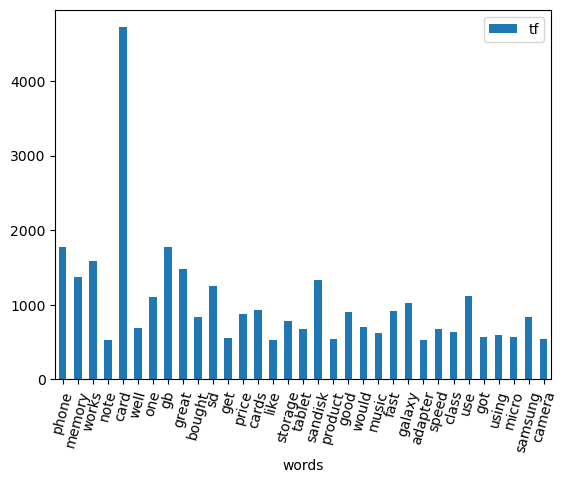

In [30]:
tf[tf["tf"]>500].plot.bar(x="words",y="tf")
plt.xticks(rotation=75)
plt.show()

### Kelime Bulutu(Word Cloud)

#### Önce bütün metni bir metinmiş gibi birleştirdik.

In [31]:
text=" ".join(i for i in df.reviewText)

In [32]:
from wordcloud import WordCloud
wordCloud=WordCloud().generate(text)

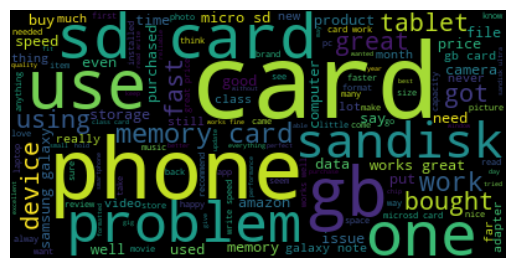

In [33]:
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### Belirli bir şablona göre wordcloud

In [34]:
from PIL import Image

foto=np.array(Image.open("R.jpg"))

In [35]:
wc=WordCloud(background_color="white",
             max_words=1000,
             mask=foto,
             contour_width=3,
             contour_color="firebrick")

             

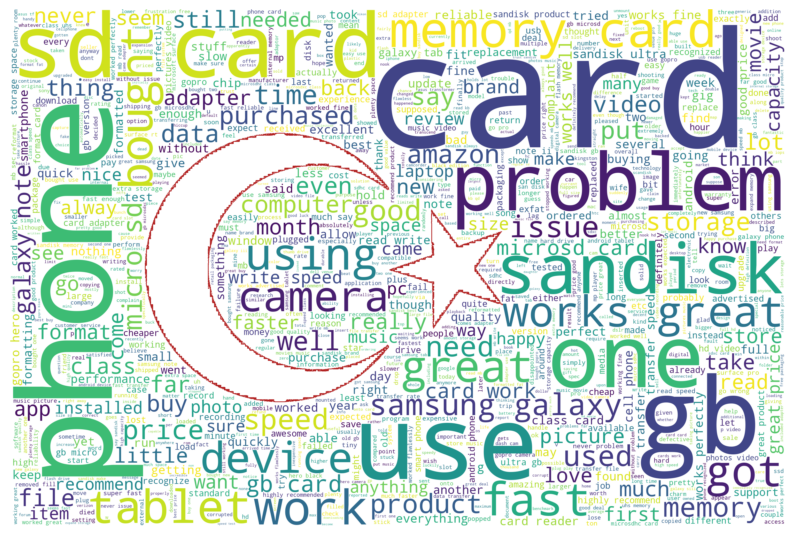

In [36]:
wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

### Sentiment Analysis

In [37]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",works expected higher capacity think made bit ...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked great gb card went south months o...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.0,best deal around,1373673600,2013-07-13,513,0,0


### Duygu Analizi yapabilmek için indirdik

In [38]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iremu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
df["reviewText"].head()

0                                               issues
1    purchased device worked advertised never much ...
2    works expected higher capacity think made bit ...
3    think worked great gb card went south months o...
4    bought retail packaging arrived legit envelope...
Name: reviewText, dtype: object

In [40]:
! pip install vaderSentiment

In [41]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [42]:
sia=SentimentIntensityAnalyzer()

### SentimentIntensitAnalyzer ile bir deneme yapalım

In [43]:
sia.polarity_scores("Miuul is beautiful")

{'neg': 0.0, 'neu': 0.339, 'pos': 0.661, 'compound': 0.5994}

In [44]:
sia.polarity_scores("The film was bad")

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

### Compound göre karar vereceğiz,0-1 arasında değer almaktadır.0'dan büyükse pozitif değilse negatif cümledir.

In [45]:
df["polarity_score"]=df["reviewText"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [46]:
df["polarity_score"]

0       0.0000
1       0.0000
2       0.4019
3       0.9201
4       0.8591
5       0.0000
6       0.8678
7       0.7351
8       0.0000
9       0.9165
10      0.9169
11      0.0000
12      0.0000
13      0.8173
14     -0.4019
15      0.7184
16      0.8316
17      0.9384
18      0.8519
19     -0.3400
20     -0.1531
21      0.7906
22      0.8834
23      0.7351
24     -0.2023
25      0.2023
26      0.4404
27      0.5267
28      0.8591
29      0.0000
30      0.8481
31      0.9399
32     -0.4404
33      0.9153
34     -0.7579
35      0.0000
36     -0.1280
37      0.8402
38      0.9606
39     -0.1027
40      0.7845
41      0.7351
42      0.7876
43     -0.7506
44      0.2500
45      0.9186
46      0.4588
47     -0.5719
48      0.7351
49     -0.6124
50      0.7430
51      0.8555
52      0.7351
53      0.4939
54      0.9744
55      0.6412
56     -0.3612
57      0.5859
58      0.1513
59      0.8910
60     -0.7096
61      0.2895
62      0.9014
63      0.8885
64     -0.5423
65      0.0000
66      0.

In [47]:
df.head(1)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues,4.0,Four Stars,1406073600,2014-07-23,138,0,0,0.0


### ANALİZ

### Duygu Analizi pozitif olanların ortalaması

In [48]:
df[df["polarity_score"]>0]["overall"].mean()

4.714868655955113

### Duygu Analizi negatif olanların ortalaması

In [49]:
df[df["polarity_score"]<0]["overall"].mean()

3.8129713423831073

### Duygu Analizi negatif olup en yüksek puanı alan yorumlar

In [50]:
df[df["polarity_score"]<0]["overall"].max() ## 5 puann

5.0

In [51]:
negatif_ama_yüksek_puan=df[df["polarity_score"]<0]["overall"].max()

In [52]:
result_df = df[(df["polarity_score"] < 0) & (df["overall"] == negatif_ama_yüksek_puan)]

In [ ]:
for i in result_df["reviewText"]:
    print(i)
    print()

In [54]:
result_df["reviewText"].iloc[0]

'heard card write speed insufficient however used extensively single problem'

### Duygu Analizi negatif olup en düşük puanı alan yorumlar

In [55]:
df[df["polarity_score"]<0]["overall"].min()

1.0

In [56]:
negatif_ve_dusuk_puan=df[df["polarity_score"]<0]["overall"].min()

In [57]:
result_df = df[(df["polarity_score"] < 0) & (df["overall"] == negatif_ve_dusuk_puan)]

In [58]:
result_df.iloc[0]["reviewText"]

'bought sandisk gb microsd used galaxy note galaxy first one phone started saying removed recognize thought luck plugged nd one stayed months died suddenly lost buying sandisk ever'

### Duygu Analizi pozitif olup en düşük puan alan yorumlar

In [59]:
df[df["polarity_score"]>0]["overall"].min()  # 1 olması ilginçç pozitif ama 1 puanı

1.0

In [60]:
pozitif_ama_dusuk_puan=df[df["polarity_score"]>0]["overall"].min()

In [61]:
result_df = df[(df["polarity_score"] > 0) & (df["overall"] == pozitif_ama_dusuk_puan)]

In [62]:
result_df["reviewText"].iloc[0]

'bougth micro sd card got kingston tell sandisk quality best phone read gb fast transfer speed pc amazing looking additional storage phone music pictures type files pros good quality materials construction amazing one year memory damaged delete put new files format memory tried format phone pc camera nothing like gb cd data memory available read move delete bought memory used backup data android device readable memory write data hope sandisk make better products future total buy samsung memory card expected better quality'

In [ ]:
for i in result_df["reviewText"]:
    print(i)
    print()

### Duygu Analizi pozitif olup en yüksek  puan alan yorumlar

In [64]:
df[df["polarity_score"]>0]["overall"].max()  

5.0

In [65]:
df["overall"].max()

5.0

## Yani beklendiği gibi duygu analizi pozitif ve en yüsek puanı 5 ilginç olan  negatif cümle olup puanı 5 olan da var ,pozitif bir cümle olup puanı 1 olan da :::))) 

### Sentiment Modeling

### Hedef değişkenini biz oluşturuyoruz = Polarity scoru 0.50'den büyükse poz,değilse neg diye sentiment_label diye yeni bir değişken oluşturup atadık.

In [66]:
df["sentiment_label"]=df["reviewText"].apply(lambda x : "pos" if sia.polarity_scores(x)["compound"] >0.50 else "neg" )

In [67]:
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,polarity_score,sentiment_label
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",issues,4.0,Four Stars,1406073600,2014-07-23,138,0,0,0.0000,neg
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]",purchased device worked advertised never much ...,5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,0.0000,neg
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",works expected higher capacity think made bit ...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,0.4019,neg
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",think worked great gb card went south months o...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,0.9201,pos
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]",bought retail packaging arrived legit envelope...,5.0,best deal around,1373673600,2013-07-13,513,0,0,0.8591,pos


In [68]:
df["sentiment_label"].value_counts()

sentiment_label
pos    2901
neg    2014
Name: count, dtype: int64

### 0.50 dedik çünkü 0 veya 0.30 deyince pos'lar daha fazla çıktı yakın değerlerde olması için 0.50 dedik 

In [69]:
df.groupby("sentiment_label")["overall"].mean()

sentiment_label
neg    4.318769
pos    4.774216
Name: overall, dtype: float64

### Label Encoding

In [70]:
df["sentiment_label"]=LabelEncoder().fit_transform(df["sentiment_label"])

### Bağımlı değişken-bağımsız değişken diye ayıralım.Bağımlı değişken duygu analizi kısımdı pos veya neg onu label encoding ettik ama bağımsız değişkenimiz yorumlar onu nasul sayısala çevireceğiz ?

### Bağımlı değişken

In [71]:
y=df["sentiment_label"]

### Bağımsız Değişken

In [90]:
X=df["reviewText"]

### Count Vectors :frekans temsiller
### TF-IDF Vectors : normalize edilmiş frekans temsiller
### Word Embedddings  (Word2Vec,GloVe,BERT vs)

*****************************************************************************************

### Count Verctors yapacağız da neye göre
### Kelimeye göre mi ,
### Karakterlere göre mi,
### Yoksa ngramlara göre mi sayacağız ?

#### Ngram

In [72]:
from textblob import TextBlob


In [73]:
a="""Lorem ipsum dolor sit amet, consectetur adipiscing elit. Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.""" 

In [74]:
TextBlob(a).ngrams(3)

[WordList(['Lorem', 'ipsum', 'dolor']),
 WordList(['ipsum', 'dolor', 'sit']),
 WordList(['dolor', 'sit', 'amet']),
 WordList(['sit', 'amet', 'consectetur']),
 WordList(['amet', 'consectetur', 'adipiscing']),
 WordList(['consectetur', 'adipiscing', 'elit']),
 WordList(['adipiscing', 'elit', 'Sed']),
 WordList(['elit', 'Sed', 'do']),
 WordList(['Sed', 'do', 'eiusmod']),
 WordList(['do', 'eiusmod', 'tempor']),
 WordList(['eiusmod', 'tempor', 'incididunt']),
 WordList(['tempor', 'incididunt', 'ut']),
 WordList(['incididunt', 'ut', 'labore']),
 WordList(['ut', 'labore', 'et']),
 WordList(['labore', 'et', 'dolore']),
 WordList(['et', 'dolore', 'magna']),
 WordList(['dolore', 'magna', 'aliqua']),
 WordList(['magna', 'aliqua', 'Ut']),
 WordList(['aliqua', 'Ut', 'enim']),
 WordList(['Ut', 'enim', 'ad']),
 WordList(['enim', 'ad', 'minim']),
 WordList(['ad', 'minim', 'veniam']),
 WordList(['minim', 'veniam', 'quis']),
 WordList(['veniam', 'quis', 'nostrud']),
 WordList(['quis', 'nostrud', 'exerci

### Count Yöntemi -Kelimelere Göre

In [78]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
corpus=["This is the first document",
        "This document is the second document",
        "And this is the third one",
        "Is this the first document"]

### Eşsiz Kelimeri Getirdik

In [84]:
vectorizer=CountVectorizer()
X_c=vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [83]:
vectorizer=CountVectorizer()
X_c=vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out() #Miuuldaki derste out yok yeni sürümü böyle :)
X_c.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

### Count Yöntemi - N-grama Göre

In [87]:
corpus

['This is the first document',
 'This document is the second document',
 'And this is the third one',
 'Is this the first document']

In [85]:
vectorizer2=CountVectorizer(analyzer="word",ngram_range=(2,2))
X_n=vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

array(['and this', 'document is', 'first document', 'is the', 'is this',
       'second document', 'the first', 'the second', 'the third',
       'third one', 'this document', 'this is', 'this the'], dtype=object)

In [86]:
X_n.toarray()

array([[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1]], dtype=int64)

### Kendi Örneğimize Dönelim -Kelimleri Sayalım

In [88]:
vectorizer=CountVectorizer()

In [92]:
X[0:2]

0                                               issues
1    purchased device worked advertised never much ...
Name: reviewText, dtype: object

In [93]:
X_count=vectorizer.fit_transform(X)

In [94]:
vectorizer.get_feature_names_out()[10:15]

array(['access', 'accessed', 'accesses', 'accessible', 'accessing'],
      dtype=object)

In [95]:
X_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### TF-IDF Yöntemi

### Nasıl Hesaplanır?

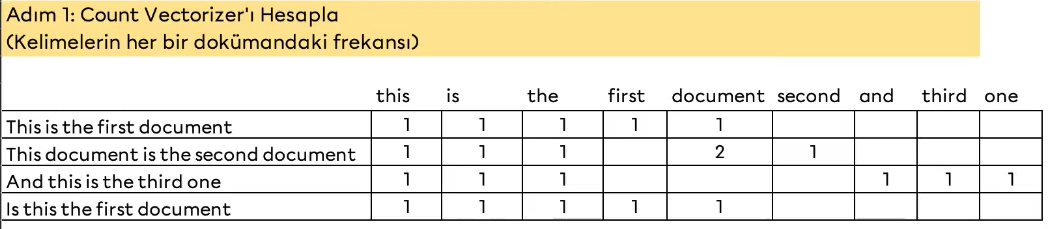

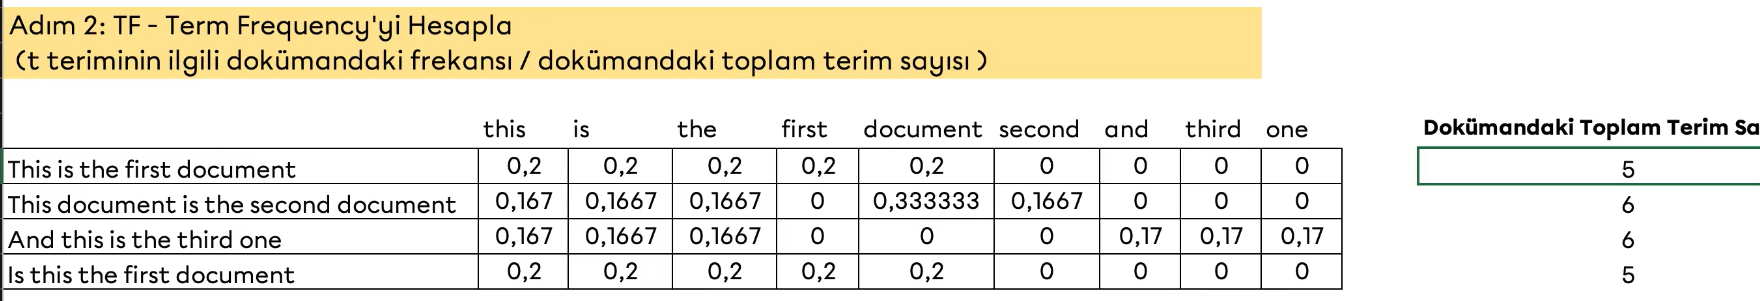

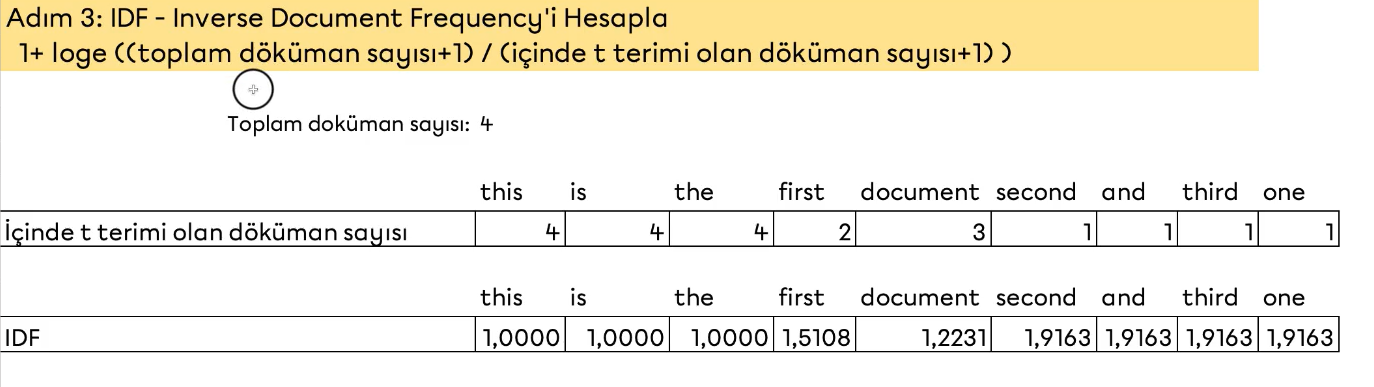

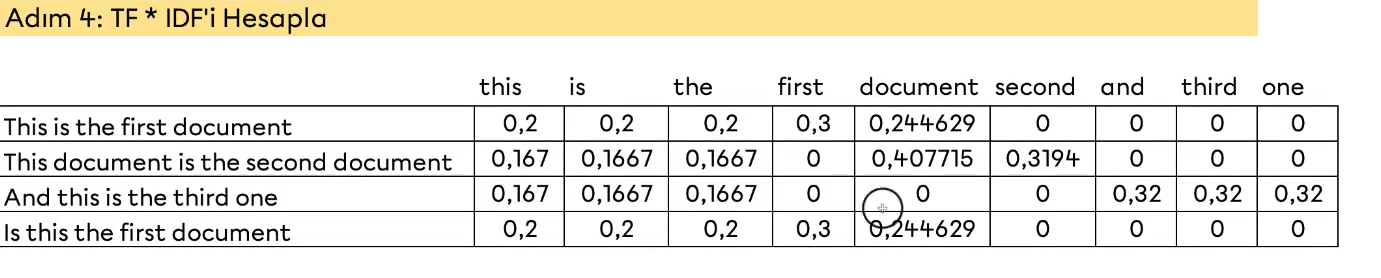

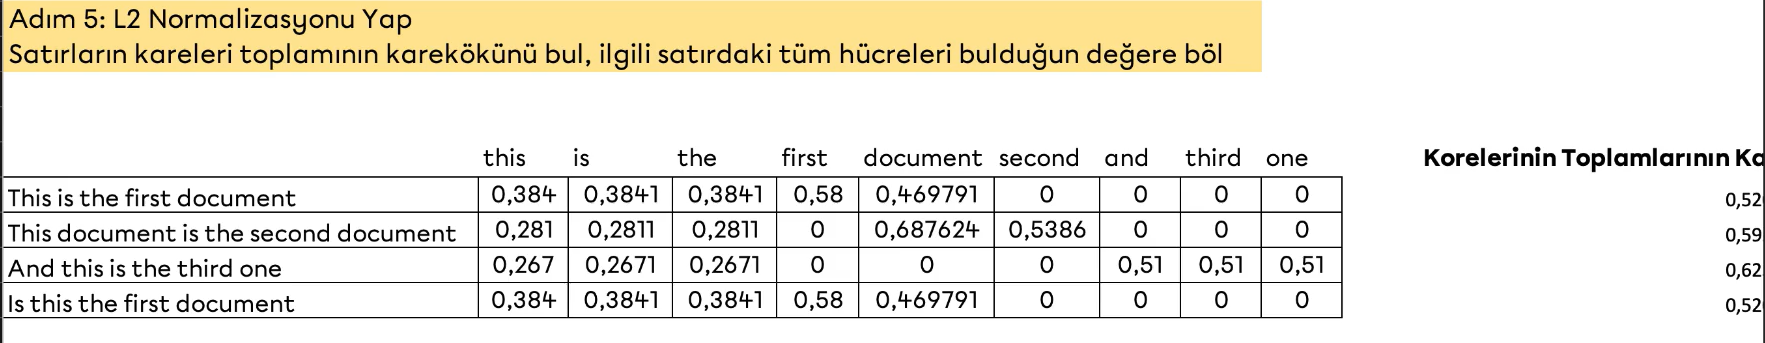

### Kendi örneğimize dönelim

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer


### Countu Kelimeye göre yapıyoruz

In [98]:
tf_idf_word_vectorizer=TfidfVectorizer()

In [99]:
X_tf_idf_word=tf_idf_word_vectorizer.fit_transform(X)

### Countu n-grama göre yapalım

In [101]:
tf_idf_ngram_vectorizer=TfidfVectorizer(ngram_range=(2,3))

In [102]:
X_tf_idf_ngram=tf_idf_ngram_vectorizer.fit_transform(X)

### Şİmdi X bağımsız (yorumlar) metin bazındaydı,stringti bu yüzden onu sayısala çevirdik 
### Ne yaptık ,countla saydırdık.Tf-Idf count ve Tf-Idf n-gram yöntemini kullandık

### Sentiment Modeling

#### Logistic Regresyon

In [104]:
log_model=LogisticRegression().fit(X_tf_idf_word,y)

In [105]:
cross_val_score(log_model,
                X_tf_idf_word,
                y,scoring="accuracy",
                cv=5).mean()

0.839471007121058

### Yeni bir yorum gelse oluşturduğumuz modele tahmin ettirelim

In [106]:
new_review=pd.Series("This is very good")

In [109]:
new_review2=pd.Series("This is bad")

### Bunu tabi ki dönüştürmemiz lazım

In [107]:
new_review=TfidfVectorizer().fit(X).transform(new_review)

In [108]:
log_model.predict(new_review)

array([1])

In [110]:
new_review2=TfidfVectorizer().fit(X).transform(new_review2)

In [111]:
log_model.predict(new_review2)

array([0])

### Random Forest

#### Count

In [112]:
rf_model=RandomForestClassifier().fit(X_count,y)

In [113]:
cross_val_score(rf_model,X_count,y,cv=5,n_jobs=1).mean()

0.8329603255340794

#### TF-IDF Count

In [114]:
rf_model=RandomForestClassifier().fit(X_tf_idf_word,y)

In [115]:
cross_val_score(rf_model,X_tf_idf_word,y,cv=5,n_jobs=1).mean()

0.8223804679552391

#### TF-IDF N-gram

In [116]:
rf_model=RandomForestClassifier().fit(X_tf_idf_ngram,y)

In [121]:
cross_val_score(rf_model,X_tf_idf_ngram,y,cv=5,n_jobs=1).mean() 
# O kadar uzun çalışıp 67 vermesi şaka mı? 

0.6738555442522888

### Hiperparametre Optimizasyonu

In [122]:
rf_model=RandomForestClassifier(random_state=42)

In [124]:
rf_params={"max_depth":[8,None],
           "max_features":[7,"auto"],
           "min_samples_split":[2,5,8],
           "n_estimators":[100,200]
               }

#### n_jobs=1 olarak ayarlanırsa, işlem tek bir çekirdek üzerinde çalışır. Bu, paralel işlem yapmaz.
#### n_jobs=-1 olarak ayarlanırsa, mevcut olan tüm çekirdekler kullanılarak işlem paralel olarak yürütülür. Bu, genellikle daha hızlı sonuç almak için kullanılır.

#### Maalesef çok uzun sürdüğü için çalıştırmadım.

In [ ]:
rbesgrid=GridSearchCV(rf_model,rf_params,cv=5,n_jobs=-1,verbose=True).fit(X_count,y)
rbesgrid.best_params_
rf_final=rf_model.set_params(**rbestgrid.best_params_,random_state=17).fit(X_count,y)
cross_val_score(rf_final,X_count,y,cv=5,n_jobs=-1).mean()
